# Airline Analysis

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

In [2]:
# Read in Data
airline = pd.read_csv('flight.csv')
airline.head()

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6
2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3
3,925,213,0,No,Yes,Yes,Saturday,No,Yes,387.835,1558.76,2
4,967,217,0,Yes,Yes,Yes,Monday,No,No,374.735,1245.58,2


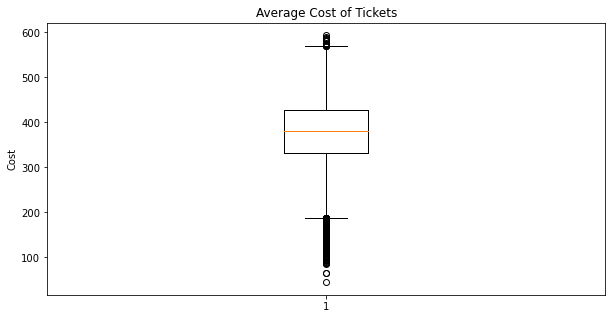

Average:  376.5852530821279
Median:  380.56


<Figure size 432x288 with 0 Axes>

In [3]:
fig = plt.figure(figsize= (10,5))
ax = plt.boxplot(airline.coach_price)
plt.title('Average Cost of Tickets')
plt.ylabel('Cost')
plt.show()
plt.clf()


print('Average: ',np.mean(airline.coach_price))
print('Median: ',np.median(airline.coach_price))




## Prices for flights that are eight hours long

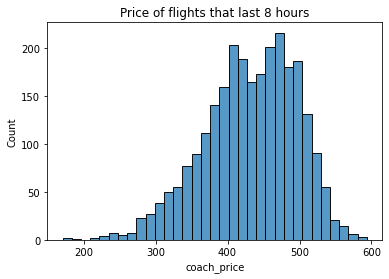

<Figure size 432x288 with 0 Axes>

In [4]:
airline_8 = airline[airline['hours'] == 8]

# Graphs
sns.histplot(airline_8.coach_price)
plt.title('Price of flights that last 8 hours')
plt.show()
plt.clf()

## Distribution of flight delay times

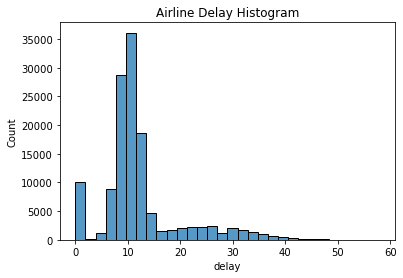

<Figure size 432x288 with 0 Axes>

In [5]:
sns.histplot(airline.delay[airline['delay'] <= 500],bins = 30)
plt.title('Airline Delay Histogram')
plt.show()
plt.clf()

## Relationship between coach and first-class prices

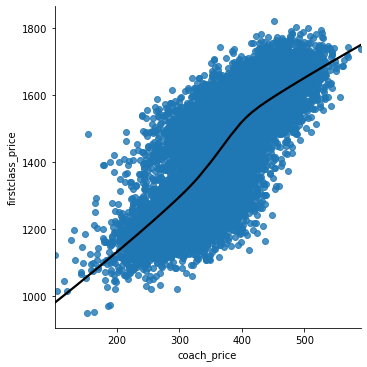

<Figure size 432x288 with 0 Axes>

In [6]:

perc = 0.1
flight_sub = airline.sample(n = int(airline.shape[0]*perc))
 
sns.lmplot(x = "coach_price", y = "firstclass_price", data = flight_sub, line_kws={'color': 'black'}, lowess=True)
plt.show()
plt.clf()

## Relationship between coach prices and inflight entertainment and Wifi

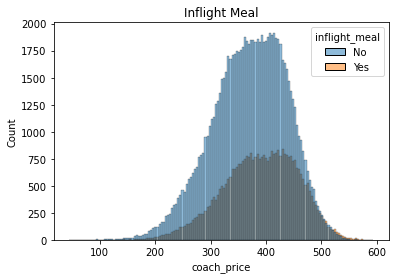

<Figure size 432x288 with 0 Axes>

In [7]:
# Inflight Meals
sns.histplot(airline, x = "coach_price", hue = airline.inflight_meal)
plt.title('Inflight Meal')
plt.show()
plt.clf()


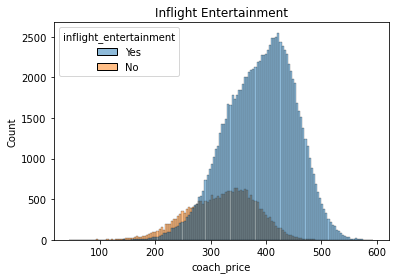

<Figure size 432x288 with 0 Axes>

In [8]:
# Inflight Entertainment
sns.histplot(airline, x = "coach_price", hue = airline.inflight_entertainment)
plt.title('Inflight Entertainment')
plt.show()
plt.clf()

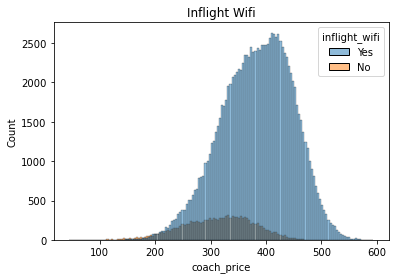

<Figure size 432x288 with 0 Axes>

In [9]:
# Inflight WiFi
sns.histplot(airline, x = "coach_price", hue = airline.inflight_wifi)
plt.title('Inflight Wifi')
plt.show()
plt.clf()

## Number of Passengers in relation to length of flight

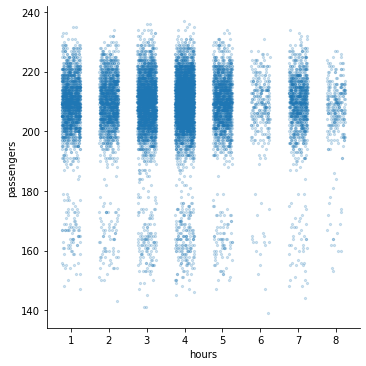

<Figure size 432x288 with 0 Axes>

In [10]:
sns.lmplot(x = "hours", y = "passengers", data = flight_sub, x_jitter = 0.25, scatter_kws={"s": 5, "alpha":0.2}, fit_reg = False)
plt.show()
plt.clf()

## Relationship betwwwn coach and first-class prices on weekends compared to holidays

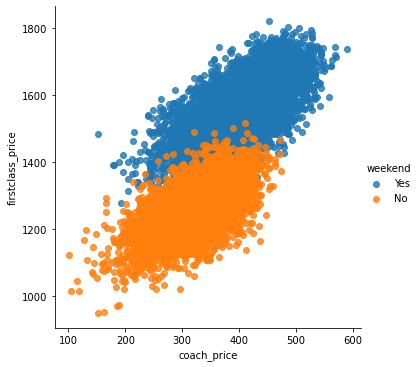

<Figure size 432x288 with 0 Axes>

In [11]:
sns.lmplot(x ='coach_price', y='firstclass_price', hue = 'weekend', data = flight_sub, fit_reg= False)
plt.show()
plt.clf()

## Visualization for redeyes and non-redeyes on each day of the week

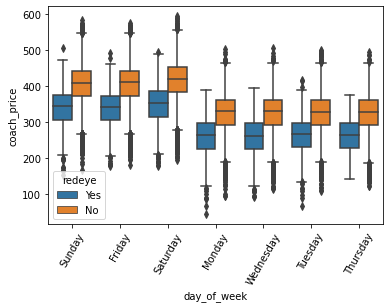

<Figure size 432x288 with 0 Axes>

In [12]:
sns.boxplot(x = "day_of_week", y = "coach_price", hue = "redeye", data = airline)
plt.xticks(rotation = 60)
plt.show()
plt.clf()